Import Libraries


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Normalise the data

In [5]:
#normalise the images (range of 0-1(minmax))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [6]:
#normalise labels (one hot encoding)
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

Build a model Func

In [7]:
def Create_model(init=None,drop=0.0,reg=None):
    model = Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(512,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(256,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(128,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(10,activation='softmax')
        ])
    return model


In [8]:
base_model=Create_model()
base_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
base_history=base_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-12 11:28:07.865467: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2427 - loss: 2.1166 - val_accuracy: 0.3059 - val_loss: 1.9342
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3495 - loss: 1.8436 - val_accuracy: 0.3500 - val_loss: 1.8162
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3815 - loss: 1.7666 - val_accuracy: 0.3575 - val_loss: 1.7768
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3964 - loss: 1.7125 - val_accuracy: 0.3642 - val_loss: 1.7493
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4139 - loss: 1.6624 - val_accuracy: 0.3963 - val_loss: 1.6906
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4252 - loss: 1.6320 - val_accuracy: 0.4071 - val_loss: 1.6572
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4409 - loss: 1.5806 - val_accuracy: 0.4097 - val_loss: 1.6562
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4374 - loss: 1.5882 - val_accuracy: 0.

In [9]:
test_loss,test_accuracy=base_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4973 - loss: 1.4262
Test Accuracy :0.4973


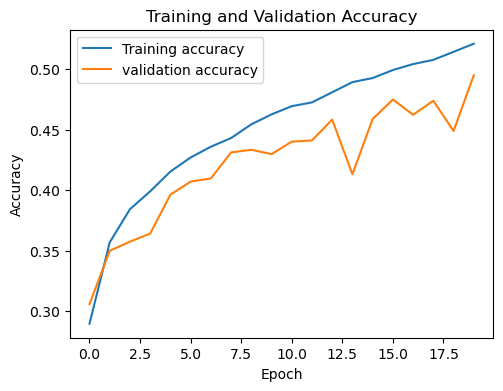

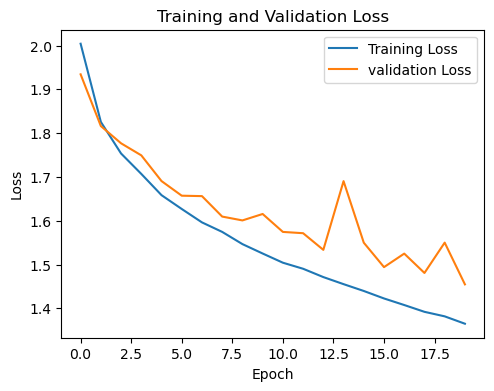

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(base_history.history['accuracy'],label='Training accuracy')
plt.plot(base_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(base_history.history['loss'],label='Training Loss')
plt.plot(base_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

XAVIER Initialisation   (Weight init)

In [11]:
from tensorflow.keras.initializers import GlorotUniform
xavier_model=Create_model(init=GlorotUniform())
xavier_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
xavier_history=xavier_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2423 - loss: 2.1051 - val_accuracy: 0.2977 - val_loss: 1.9759
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3484 - loss: 1.8501 - val_accuracy: 0.3560 - val_loss: 1.8274
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3780 - loss: 1.7707 - val_accuracy: 0.3787 - val_loss: 1.7470
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3953 - loss: 1.7162 - val_accuracy: 0.3903 - val_loss: 1.7425
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4112 - loss: 1.6689 - val_accuracy: 0.4006 - val_loss: 1.6822
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4254 - loss: 1.6357 - val_accuracy: 0.3541 - val_loss: 1.8211
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4359 - loss: 1.6127 - val_accuracy: 0.3792 - val_loss: 1.7255
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4412 - loss: 1.5769 - val_accuracy: 0.

In [12]:
test_loss,test_accuracy=xavier_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4858 - loss: 1.4559
Test Accuracy :0.4858


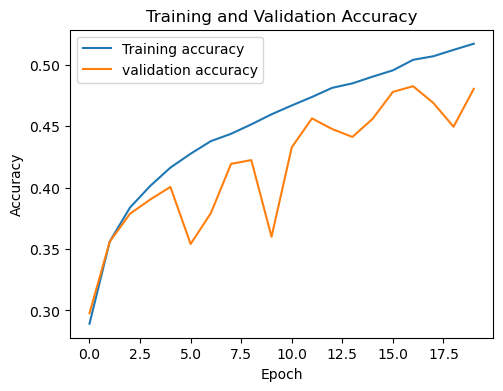

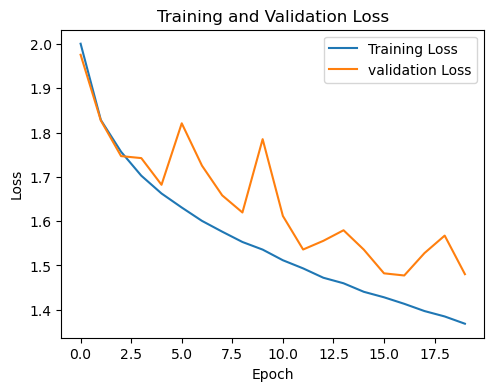

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(xavier_history.history['accuracy'],label='Training accuracy')
plt.plot(xavier_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(xavier_history.history['loss'],label='Training Loss')
plt.plot(xavier_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Kaiming Initialisation   (Weight init)

In [14]:
from tensorflow.keras.initializers import HeNormal
kaiming_model=Create_model(init=HeNormal())
kaiming_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
kaiming_history=kaiming_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2411 - loss: 2.1024 - val_accuracy: 0.3187 - val_loss: 1.8966
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3536 - loss: 1.8242 - val_accuracy: 0.3781 - val_loss: 1.7743
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3870 - loss: 1.7416 - val_accuracy: 0.3642 - val_loss: 1.7810
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4077 - loss: 1.6741 - val_accuracy: 0.3914 - val_loss: 1.7019
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4260 - loss: 1.6363 - val_accuracy: 0.4106 - val_loss: 1.7097
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4442 - loss: 1.5895 - val_accuracy: 0.4028 - val_loss: 1.6706
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4466 - loss: 1.5693 - val_accuracy: 0.4320 - val_loss: 1.6096
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4557 - loss: 1.5463 - val_accuracy: 0.

In [15]:
test_loss,test_accuracy=kaiming_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4808 - loss: 1.4559
Test Accuracy :0.4808


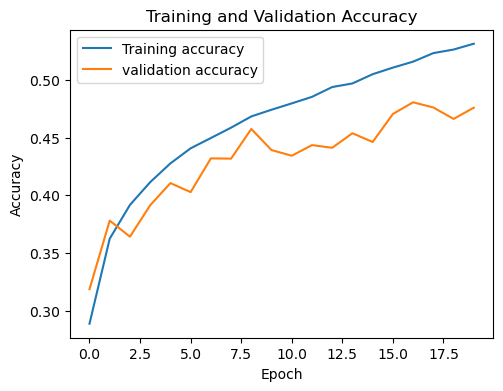

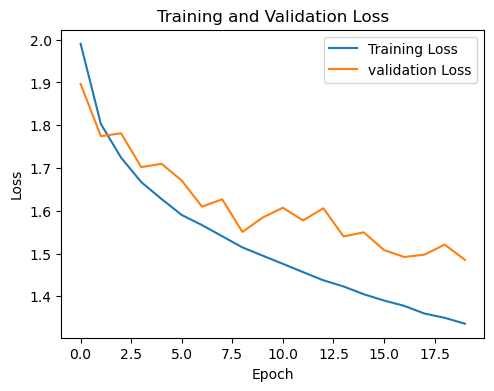

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kaiming_history.history['accuracy'],label='Training accuracy')
plt.plot(kaiming_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(kaiming_history.history['loss'],label='Training Loss')
plt.plot(kaiming_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [17]:
#dropout model

In [18]:
dropout_model= Create_model(drop=0.5)
dropout_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
dropout_history=dropout_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1201 - loss: 2.3781 - val_accuracy: 0.2325 - val_loss: 2.1974
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1736 - loss: 2.2220 - val_accuracy: 0.2558 - val_loss: 2.0912
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1944 - loss: 2.1440 - val_accuracy: 0.2931 - val_loss: 2.0246
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2164 - loss: 2.0908 - val_accuracy: 0.3057 - val_loss: 1.9683
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2341 - loss: 2.0551 - val_accuracy: 0.3105 - val_loss: 1.9327
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2534 - loss: 2.0091 - val_accuracy: 0.3231 - val_loss: 1.9094
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2681 - loss: 1.9866 - val_accuracy: 0.3354 - val_loss: 1.8735
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2749 - loss: 1.9616 - val_accuracy: 0.

In [20]:
test_loss,test_accuracy=dropout_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4022 - loss: 1.6949
Test Accuracy :0.4022


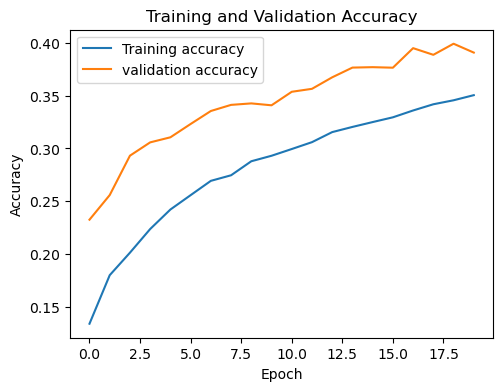

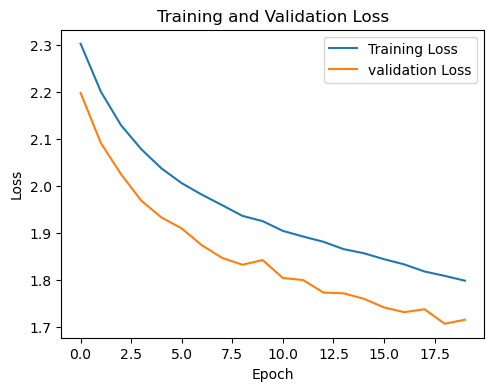

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(dropout_history.history['accuracy'],label='Training accuracy')
plt.plot(dropout_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(dropout_history.history['loss'],label='Training Loss')
plt.plot(dropout_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [23]:
# L2 regularisation

In [24]:
from tensorflow.keras.regularizers import l2
l2_model=Create_model(reg=l2(0.001))
l2_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
l2_history=l2_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2391 - loss: 3.4947 - val_accuracy: 0.3193 - val_loss: 3.2845
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3490 - loss: 3.2127 - val_accuracy: 0.3257 - val_loss: 3.2167
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3752 - loss: 3.1241 - val_accuracy: 0.3530 - val_loss: 3.1584
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3982 - loss: 3.0558 - val_accuracy: 0.2976 - val_loss: 3.2561
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4123 - loss: 2.9982 - val_accuracy: 0.3851 - val_loss: 3.0547
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4249 - loss: 2.9385 - val_accuracy: 0.4182 - val_loss: 2.9496
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4285 - loss: 2.9090 - val_accuracy: 0.4114 - val_loss: 2.9646
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4460 - loss: 2.8589 - val_accuracy: 0.

In [25]:
test_loss,test_accuracy=l2_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 2ms/step - accuracy: 0.4867 - loss: 2.5665
Test Accuracy :0.4867


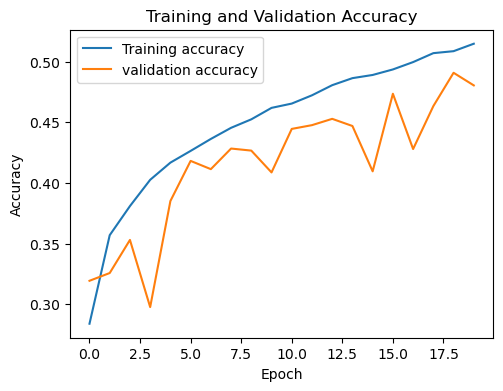

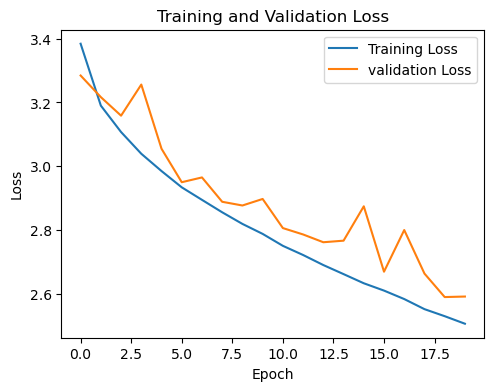

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(l2_history.history['accuracy'],label='Training accuracy')
plt.plot(l2_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(l2_history.history['loss'],label='Training Loss')
plt.plot(l2_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()